In [1]:
import os,sys
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import numpy as np
#import keras

In [2]:
from PIL import Image, ImageFilter


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

In [36]:
os.chdir(r'c:\data_python\Shoe Classifier\TEST')

In [38]:
#Transfer column to row#
a_array = np.array([a])
#No transfer column to row#
a_array = np.array(a)

In [39]:
a_array.shape

(1, 784)

In [54]:
a = list()
for i in np.arange(51,71,1):    
    a.append(imageprepare('ADIDAS_'+str(i)+'.png'))

In [55]:
for i in np.arange(51,71,1):    
    a.append(imageprepare('NIKE_'+str(i)+'.png'))

In [53]:
np.arange(51,71,1)

array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70])

In [6]:
for i in range(1,9002,1):    
    a.append(imageprepare('NG('+str(i)+')_cropped.jpg'))

In [9]:
os.chdir(r'c:\data_python\QC\M10_20180525\NG')

In [41]:
np.savetxt("Shoe_test_example.csv", a_array, delimiter=",")

In [3]:
pwd

'C:\\Users\\john.woo'

In [12]:
sys.path.append('C:\data_python\deep-learning-from-scratch-master\ch04')

In [13]:
os.chdir('C:\data_python\deep-learning-from-scratch-master\ch04')

In [17]:
pwd

'C:\\data_python\\deep-learning-from-scratch-master\\ch04'

In [14]:
from two_layer_net import TwoLayerNet

In [15]:
os.chdir(r'C:\data_python\QC_test_cropped2')

In [23]:
QC = pd.read_csv('QC_test_cropped2.csv')

In [24]:
QC.shape

(18002, 785)

In [25]:
type(QC)

pandas.core.frame.DataFrame

In [26]:
QC_label = QC.loc[: , "Label"]

In [27]:
QC_label

0        OK
1        OK
2        OK
3        OK
4        OK
5        OK
6        OK
7        OK
8        OK
9        OK
10       OK
11       OK
12       OK
13       OK
14       OK
15       OK
16       OK
17       OK
18       OK
19       OK
20       OK
21       OK
22       OK
23       OK
24       OK
25       OK
26       OK
27       OK
28       OK
29       OK
         ..
17972    NG
17973    NG
17974    NG
17975    NG
17976    NG
17977    NG
17978    NG
17979    NG
17980    NG
17981    NG
17982    NG
17983    NG
17984    NG
17985    NG
17986    NG
17987    NG
17988    NG
17989    NG
17990    NG
17991    NG
17992    NG
17993    NG
17994    NG
17995    NG
17996    NG
17997    NG
17998    NG
17999    NG
18000    NG
18001    NG
Name: Label, Length: 18002, dtype: object

In [28]:
QC_label2 = np.array(QC_label)

In [29]:
QC_label2

array(['OK', 'OK', 'OK', ..., 'NG', 'NG', 'NG'], dtype=object)

In [30]:
QC_data = QC.loc[: , "1":"784"]

In [31]:
QC_data

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
QC_data2 = np.array(QC_data)

In [33]:
QC_data2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
type(QC_data2)

numpy.ndarray

In [35]:
QC_label3 = list()
for i in np.arange(0,len(QC_label2),1):
    if QC_label2[i] == "NG":
        QC_label3.append(1)
    else:
        QC_label3.append(0)       

In [36]:
#Array Separate 함수
def split(arr, size):
     arrs = []
     while len(arr) > size:
         pice = arr[:size]
         arrs.append(pice)
         arr   = arr[size:]
     arrs.append(arr)
     return arrs

In [37]:
QC_label4 = split(QC_label3,1)

In [38]:
QC_label4 = np.array(QC_label4)

In [39]:
QC_label4

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [22]:
# 트레이닝 & 테스트 데이터 셋 분할 (75%, 25%) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(QC_data2,QC_label4,random_state=0)

In [142]:
y_test.shape

(651,)

In [23]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc, test acc | 1.0, 1.0
train acc, test acc | 0.20057773498259387, 0.194179071317485
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.07614250796237315, 0.08331481892912686
train acc, test acc | 0.0876972076142508, 0.08998000444345701
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.03133101251759129, 0.03310375472117307
train acc, test acc | 0.934375231464336, 0.9277938235947567
train acc, test acc | 0.469298570476261, 0.4767829371250833
train acc, test acc | 0.00844381897637212, 0.007998222617196179


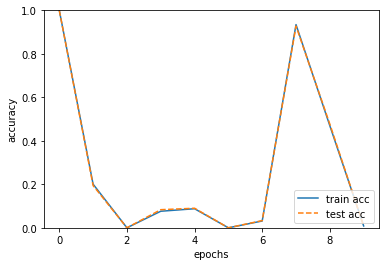

In [24]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=2)

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = X_train.shape[0]
batch_size = 1000   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = 1000

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    t_batch = y_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc = network.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [36]:
y_test[2]

array([0])

In [48]:
max(train_size / batch_size, 1)

135.01

In [44]:
batch_size

500

In [47]:
X_train.shape[0]

13501

In [58]:
for i in range(5000,6000):
    a = network.predict(X_train[i])
    print(a)

[0.80577304 0.19422696]
[0.741442 0.258558]
[0.82666967 0.17333033]
[0.84733839 0.15266161]
[0.80577079 0.19422921]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.89420068 0.10579932]
[0.80577308 0.19422692]
[0.89420068 0.10579932]
[0.80577308 0.19422692]
[0.80577277 0.19422723]
[0.89420067 0.10579933]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.85705248 0.14294752]
[0.86438947 0.13561053]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.80577306 0.19422694]
[0.75275132 0.24724868]
[0.80577308 0.19422692]
[0.87818617 0.12181383]
[0.86870939 0.13129061]
[0.8345525 0.1654475]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.89420068 0.10579932]
[0.89420068 0.10579932]
[0.80577308 0.19422692]
[0.88184578 0.11815422]
[0.89358688 0.10641312]
[0.80577275 0.19422725]
[0.88791415 0.11208585]
[0.89420068 0.10579932]
[0.80206347 0.19793653]
[0.85201617 0.14798383]
[0.753219 0.246781]
[0

[0.80577303 0.19422697]
[0.8005918 0.1994082]
[0.80577308 0.19422692]
[0.83577585 0.16422415]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.83552506 0.16447494]
[0.80577308 0.19422692]
[0.80577278 0.19422722]
[0.80577308 0.19422692]
[0.89420067 0.10579933]
[0.89420036 0.10579964]
[0.76832991 0.23167009]
[0.89420068 0.10579932]
[0.86368211 0.13631789]
[0.80577308 0.19422692]
[0.8941836 0.1058164]
[0.50542877 0.49457123]
[0.80577308 0.19422692]
[0.88139648 0.11860352]
[0.80577308 0.19422692]
[0.85234928 0.14765072]
[0.89420066 0.10579934]
[0.89420067 0.10579933]
[0.89420067 0.10579933]
[0.89420068 0.10579932]
[0.80577308 0.19422692]
[0.80318996 0.19681004]
[0.84097549 0.15902451]
[0.89420068 0.10579932]
[0.89420067 0.10579933]
[0.87386358 0.12613642]
[0.89420068 0.10579932]
[0.89420068 0.10579932]
[0.84562715 0.15437285]
[0.89420068 0.10579932]
[0.84103345 0.15896655]
[0.89420068 0.10579932]
[0.86707508 0.13292492]
[0.80577308 0.19422692]
[0.80577156 0.19422844]
[0.87915906 0.120840

[0.89420068 0.10579932]
[0.86436175 0.13563825]
[0.84020719 0.15979281]
[0.8518008 0.1481992]
[0.77326034 0.22673966]
[0.78201577 0.21798423]
[0.80577302 0.19422698]
[0.85422666 0.14577334]
[0.80546462 0.19453538]
[0.84929491 0.15070509]
[0.89420067 0.10579933]
[0.80577308 0.19422692]
[0.47230084 0.52769916]
[0.89420068 0.10579932]
[0.80577308 0.19422692]
[0.80577308 0.19422692]
[0.89420068 0.10579932]
[0.80514614 0.19485386]
[0.89420068 0.10579932]
[0.80577308 0.19422692]
[0.81039626 0.18960374]
[0.89420068 0.10579932]
[0.80577308 0.19422692]
[0.8345525 0.1654475]
[0.8057711 0.1942289]
[0.86047752 0.13952248]
[0.89408461 0.10591539]
[0.86824485 0.13175515]
[0.8402554 0.1597446]
[0.80577301 0.19422699]
[0.80577308 0.19422692]
[0.84756637 0.15243363]
[0.80577308 0.19422692]
[0.85207703 0.14792297]
[0.56118727 0.43881273]
[0.80577308 0.19422692]
[0.89419974 0.10580026]
[0.89340412 0.10659588]
[0.75367631 0.24632369]
[0.80577308 0.19422692]
[0.4993992 0.5006008]
[0.78944965 0.21055035]
[0

In [1]:
from sklearn.neural_network import MLPClassifier

In [25]:
X_train.shape

(13501, 784)

In [84]:
#MLP Library
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=[15,15],max_iter=1000,alpha=0.01)

In [27]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [28]:
from sklearn.datasets import make_moons

In [29]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [33]:
X.shape

(100, 2)

In [85]:
mlp.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[15, 15], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [91]:
mlp.score(X_train,y_train)

0.9849640767350567

In [92]:
mlp.score(X_test,y_test)

0.9822261719617863

In [65]:
X_test.shape

(4501, 784)

In [86]:
y_predict = np.array(mlp.predict(X_train))

In [69]:
y_predict

array([0, 0, 1, ..., 1, 1, 0])

In [88]:
y_predict2 = split(y_predict,1)

In [89]:
y_predict2 = np.array(y_predict2)

In [82]:
# Confusion Matrix Library
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_train,y_predict2, labels=[1,0])

array([[6616,   96],
       [ 107, 6682]], dtype=int64)

In [1]:
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf

<module 'tensorflow' from 'C:\\Anaconda3\\lib\\site-packages\\tensorflow\\__init__.py'>